# Закрепление знаний по визуализации данных в Python

Даны данные об оттоке клиентов в некотором банке.

Цель - выявить причины и закономерности в оттоке клиентов. Нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.



In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

churn_data = pd.read_csv('data/churn.csv')
display(churn_data.head())

churn_df = churn_data.copy()

churn_df.drop('RowNumber', axis=1, inplace=True) #убираем лишний столбец
churn_df['Exited'] = churn_df['Exited'].apply(lambda x: "Лояльные" if x == 0 else "Ушедшие") #заменим 0 и 1 на слова для понятности


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

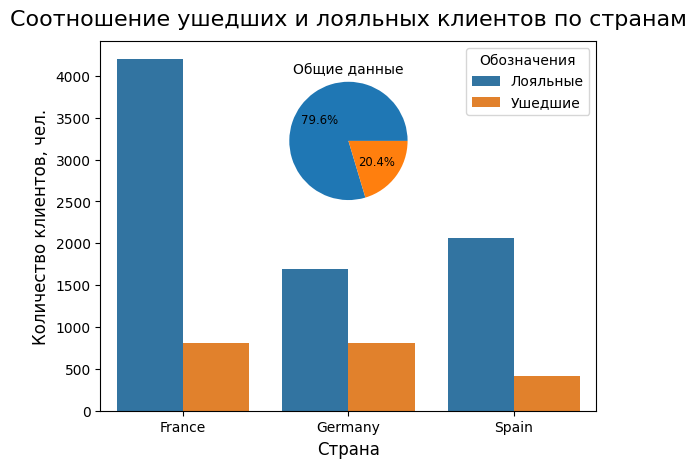

In [80]:
fig, ax = plt.subplots()

#Обобщенные данные по всем странам в виде круговой диаграммы 
exited_sum = churn_df['Exited'].value_counts().sort_values(ascending=False)
exited_pie = ax.inset_axes([0.3, 0.53, 0.4, 0.4])
exited_pie.pie(
    exited_sum,
    autopct='%1.1f%%',
    textprops={'size': 'smaller'}
)
exited_pie.set_title('Общие данные', fontsize=10, y=0.9)
exited_pie.tick_params(labelsize=12)

#Данные по странам в виде столбчатой диаграммы
geo_groups = churn_df.groupby(by='Geography',as_index=False)['Exited'].value_counts()

ax = sns.barplot(
    data=geo_groups,
    x='Geography',
    y='count',
    hue='Exited'
)
ax.set_title('Соотношение ушедших и лояльных клиентов по странам', fontsize=16, y=1.02)
ax.set_xlabel('Страна', fontsize=12)
ax.set_ylabel('Количество клиентов, чел.', fontsize=12)
ax.legend(title='Обозначения');

Вывод: из диаграмм видно, что отток по всем странам в совокупности составляет 20.4%, при этом наименьший отток наблюдается во Франции (если учитывать количество лояльных клиентов), а вот в Германии отток, если сравнивать с количеством лояльных клиентов, наибольший, что требует дополнительного исследования. 

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

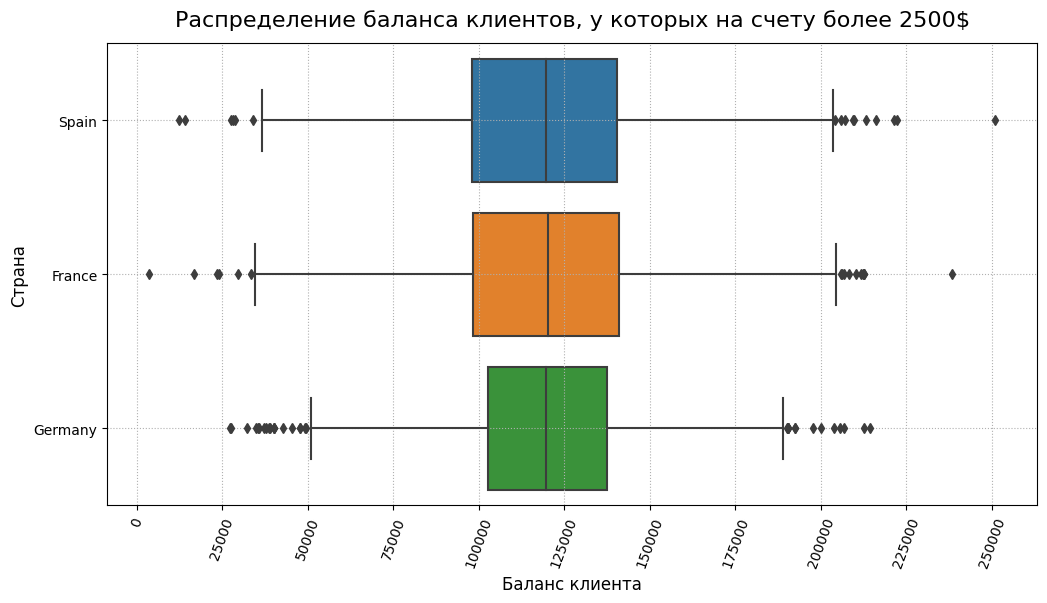

In [81]:
rich_client = churn_df[(churn_df['Balance'] >= 2500.0)] # отсортируем клиентов, у которых баланс больше 2500$

fig = plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(
    data=rich_client,
    x='Balance',
    y='Geography'
)
boxplot.set_title('Распределение баланса клиентов, у которых на счету более 2500$', fontsize=16, y=1.02)
boxplot.set_xlabel('Баланс клиента', fontsize=12)
boxplot.set_ylabel('Страна', fontsize=12)
boxplot.tick_params(axis='x',rotation=70)
boxplot.xaxis.set_major_locator(ticker.MultipleLocator(25000))
boxplot.grid(linestyle=':');


Вывод: медианное значение распределения баланса богатых клиентов во всех странах практически одинаковое и примерно равно 120 000 долларов, то есть половина богатых клиентов имеет сумму 120 000. Для всех стран есть выбросы, но больше всего их для Германии, что требует дополнительного исследования, при этом в Германии межквартильный размах и границы распределения наименьшие из всех стран, что говорит о меньшей разнице в балансах группы богатых клиентов, в отличии от Франции и Испании. В Германии мало клиентов с балансом меньше 50 000 и больше 190 000, а во Франции и Испании есть клиенты, у которых баланс менее 40000 и более 200 000. 75% клиентов во всех странах имеют баланс выше 100 000$, при этом в Германии процент таких клиентов меньше, чем в Испании или Франции.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

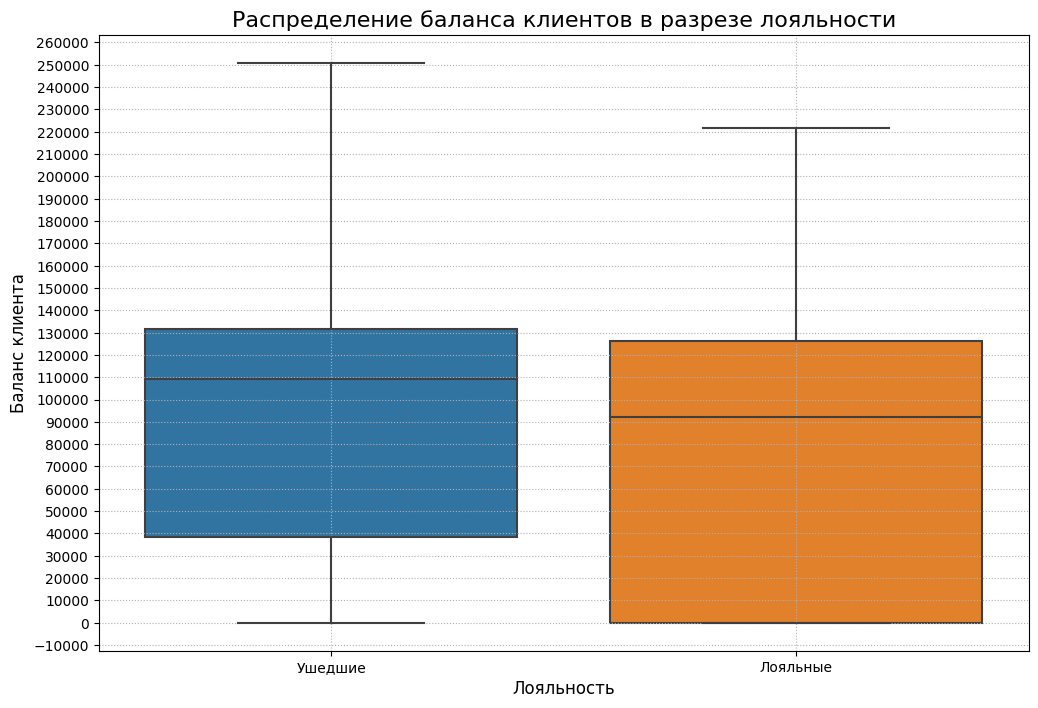

In [82]:
fig = plt.figure(figsize=(12, 8))
boxplot = sns.boxplot(
    data=churn_df,
    x='Exited',
    y='Balance'
)
boxplot.set_title('Распределение баланса клиентов в разрезе лояльности', fontsize=16)
boxplot.set_xlabel('Лояльность', fontsize=12)
boxplot.set_ylabel('Баланс клиента', fontsize=12)
boxplot.yaxis.set_major_locator(ticker.MultipleLocator(10000))
boxplot.grid(linestyle=':');

Вывод: из графика видно, что 75% лояльных клиентов имеют баланс ниже 130 000 долларов, что не сильно отличается от баланса 75% ушедших клиентов. А вот 25% ушедших клиентов имеют баланс от 130 000 до 250 000, тогда как для лояльных этот диапазон 125 000 и 225 000 соответственно. Также половина ушедших клиентов имеет на счету не менее 110 000 долларов, а у лояльных клиентов половина имеет на счету 90 000. Это говорит о том, что чаще уходят богатые клиенты, значит условия для держателей больших вкладов не такие выгодные, как для держателей маленьких вкладов или нулевого баланса (25% лояльных клиентов имеют на счету 0 долларов).

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

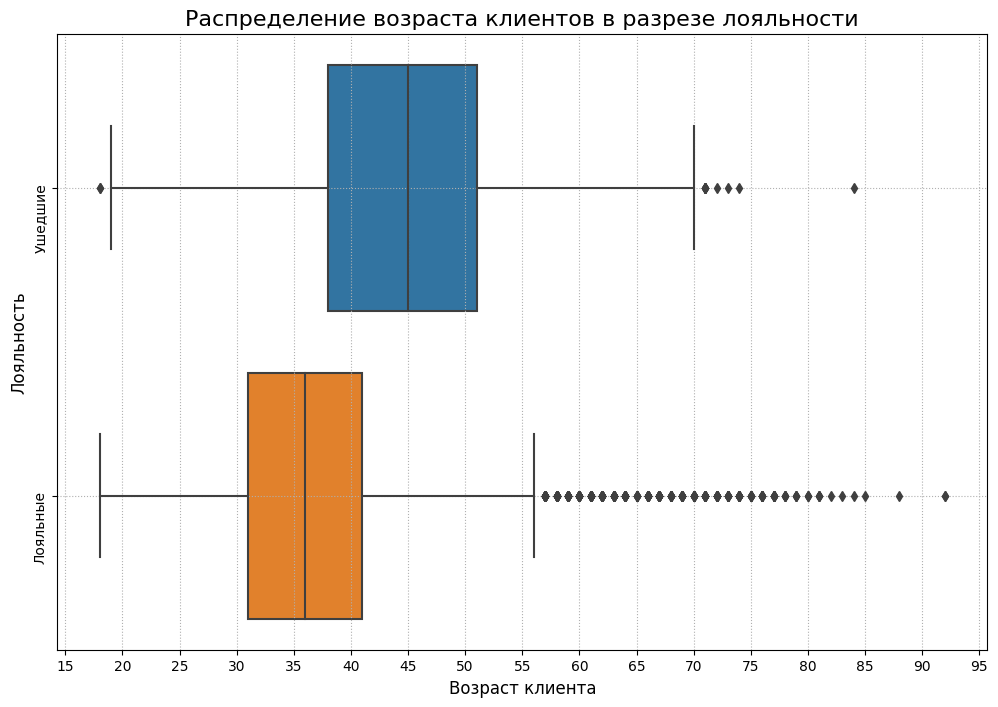

In [83]:
fig = plt.figure(figsize=(12, 8))
boxplot = sns.boxplot(
    data=churn_df,
    x='Age',
    y='Exited'
)
boxplot.set_title('Распределение возраста клиентов в разрезе лояльности', fontsize=16)
boxplot.set_xlabel('Возраст клиента', fontsize=12)
boxplot.tick_params(axis='y',rotation=90)
boxplot.set_ylabel('Лояльность', fontsize=12)
boxplot.xaxis.set_major_locator(ticker.MultipleLocator(5))
boxplot.grid(linestyle=':');

Вывод: можно заметить, что лояльные клиенты не старше 56 лет, а 50% ушедших от 45 лет и старше. Можно сделать вывод, что для клиентов старшего поколения банк предлагает менее выгодные условия, чем для молодых клиентов, например более дорогое страхование жизни по вкладам или ипотеке. Поскольку в данных нет даты, на которую эти данные были выгружены, можно также предположить, что если данные выгружены в период пандемии, то большой отток среди пожилых клиентов связан с большей смертностью среди пожилых людей от пандемии, так как в нормальных условиях пожилые люди реже меняют банк. Этим же можно объяснить выбросы в сторону большего возраста, так как численность людей старше 60 лет в принципе не большая, кроме того не у всех из них есть доходы, которые можно хранить в банке, если банк не специализируется на хранении пенсионных накоплений или выплат. Банку рекомендуется пересмотреть условия для клиентов старше 37 лет.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

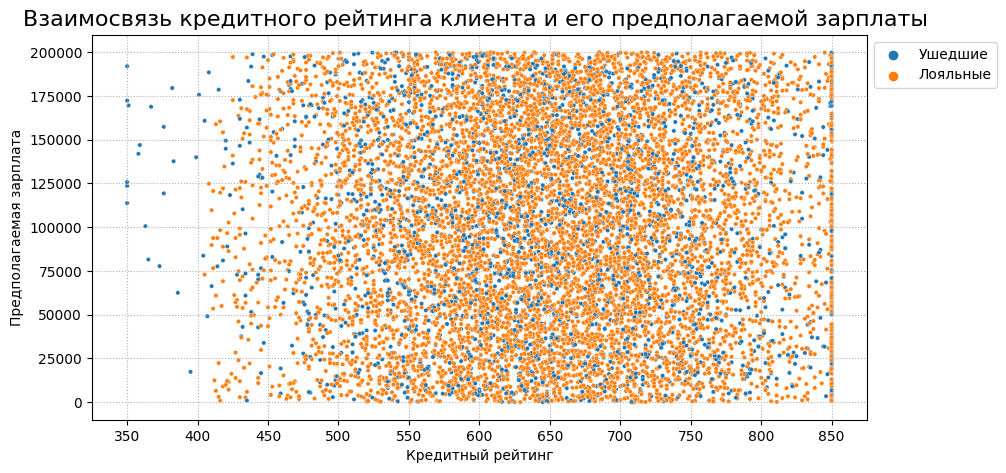

In [84]:
fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=churn_df,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',
    s=10,
    sizes=(50, 500)

)
scatterplot.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты ', fontsize=16)
scatterplot.set_xlabel('Кредитный рейтинг')
scatterplot.set_ylabel('Предполагаемая зарплата')
scatterplot.xaxis.set_major_locator(ticker.MultipleLocator(50))
scatterplot.legend(bbox_to_anchor = (1, 1))
scatterplot.grid(linestyle=':');

Вывод: из графика можно заметить, что среди ушедших клиентов есть те, которые брали кредит и не возвращали его, либо никогда не брали кредит. А вот среди лояльных таких клиентов нет, это видно по отсутствию оранжевых точек в полях рейтинга ниже 400. К сожалению неизвестно какой рейтинг выдается банком новым клиентам, поэтому невозможно определить, у каких клиентов рейтинг повысился, а у каких понизился, от изначального. Но можно заметить, что большинство клиентов имеет рейтинг от 550 до 750, при этом явной зависимости от предполагаемого дохода не наблюдается. Можно лишь сделать вывод, что у людей с доходом ниже 50 000 долларов рейтинг в основном от 410 и выше. Еще из графика видно скопление точек на рейтинге 850, а вот от 800 до 850 наоборот график разрежен, это может объяснятся тем, что для клиентов с хорошей кредитной историей банк предлагает больше привелегий, но эти привилегии были введены не сразу и большая часть клиентов не успела заработать такой балл. Также банку рекомендуется обратить внимание на клиентов с высоким кредитным рейтингом и на клиентов с вкладами от 75 000 долларов.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

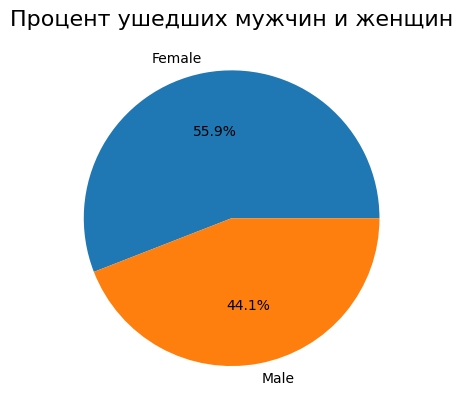

In [85]:
exited_gender = churn_df[churn_df['Exited'] == 'Ушедшие']['Gender'].value_counts().sort_values(ascending=False)

fig, ax = plt.subplots()
ax.pie(
    exited_gender,
    labels=exited_gender.index,
    autopct='%1.1f%%',
)
ax.set_title('Процент ушедших мужчин и женщин', fontsize=16, y=1)
ax.tick_params(labelsize=12)

Вывод: чаще от услуг банка отказываются женщины, поэтому банку рекомендуется проверить различия в условиях и услугах предоставляемых женщинам и мужчинам.

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [86]:
import plotly
import plotly.express as px

#вернем значения в столбце оттока для удобства подсчета, а также создадим столбец-противоположность - Лояльность
churn_df['Exited'] = churn_df['Exited'].replace('Ушедшие', 1)
churn_df['Exited'] = churn_df['Exited'].replace('Лояльные', 0)
churn_df['Loyal'] = 1 - churn_df['Exited']

#сформируем с помощью группировки таблицу с необходимыми данными
groups_product = churn_df.groupby(['NumOfProducts'])[['Exited', 'Loyal']].sum()

fig = px.bar(
    data_frame=groups_product,
    x=groups_product.index,
    y=['Exited','Loyal'],
    width=1000,
    labels={'value': 'Количество клиентов, чел.', 'NumOfProducts':'Количество приобретенных услуг', 'variable':'Обозначения'},
    title='Зависимость оттока клиентов от числа приобретенных ими услуг'
)
display(fig)

Вывод: из графика видно, что процент влыдельцев имеющих одну или две услуги банка и отказывающихся от обслуживания в банке значительно меньше, чем процент владельцев трех и более услуг. Можно предположить, что какие-то из услуг банка изменили условия использования или наличие большого количества услуг в данном банке влечет больше расходов, чем привилегий, что не сразу становится понятно клиентам. Также возможно наличие в этих странах банков, где большее количество услуг существенно выгоднее для клиентов и при решении воспользоваться тремя и более услугами, клиенты переходят в другой банк. 

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

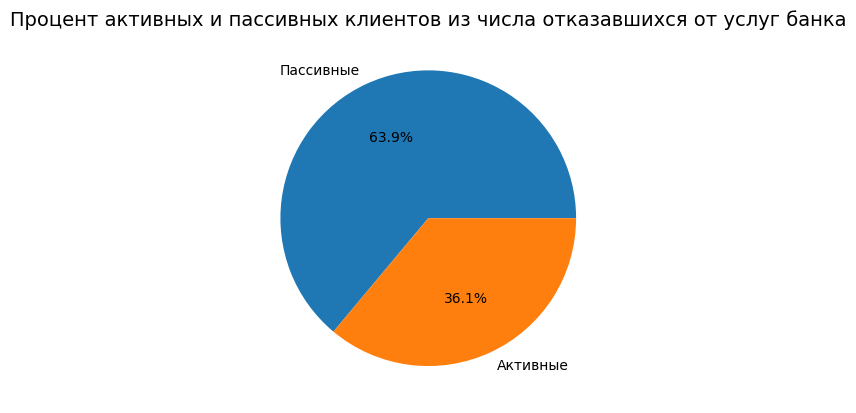

In [87]:
exited_activity = churn_df[churn_df['Exited'] == 1]['IsActiveMember'].value_counts().sort_values(ascending=False)

fig, ax = plt.subplots()
ax.pie(
    exited_activity,
    labels=['Пассивные','Активные'],
    autopct='%1.1f%%',
)

ax.set_title('Процент активных и пассивных клиентов из числа отказавшихся от услуг банка', fontsize=14, y=1)
ax.tick_params(labelsize=12)

Вывод: из графика видно, что 63,9% ушедших клиентов на момент ухода имели статус пассивных, в данному случае банку рекомендуется повысить активность клиентов новыми услугами, акциями, привилегиями, также можно провести опрос пассивных клиентов, чтобы узнать причины, по которым они не пользуются услугами банка. Также можно исследовать перечень продуктов, которыми пользуются активные клиенты и сравнить с теми, которыми пользовались пассивные клиенты.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [88]:
#формируем данные для графика
group_data = churn_df.groupby(['Geography'], as_index=False)['Exited'].mean()

fig = px.choropleth(
    data_frame=group_data,
    locations='Geography',
    locationmode = 'country names',
    color='Exited',
    labels={'Exited':'Доля ушедших'},
    title='Доля ушедших клиентов по странам',
    width=800, 
    height=500, 
    color_continuous_scale='teal'
)

fig.show()

Вывод: как и было определено ранее, во Франции отток клиентов наименьший, а в Германии наибольший. Возможно это связано с изменением законодательства страны в части банковской сферы или сфере налогообложения, как известно в Германии самые жесткие налоги, чем в двух других странах.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

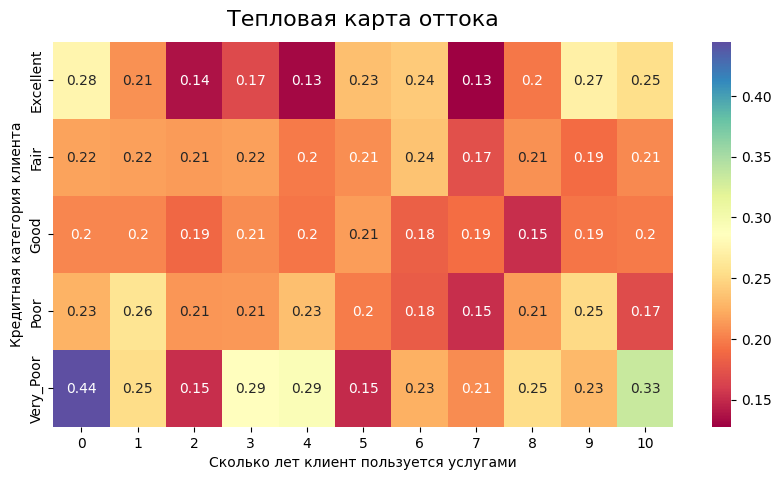

In [90]:
# Функция преобразования кредитного рейтинга в кредитную катенгорию
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

# Создаем столбец кредитной категории
churn_df['CreditScoreCat'] = churn_df['CreditScore'].apply(get_credit_score_cat)

# Создаем сводную таблицу для графика
pivot_data = churn_df.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
)

# Рисуем тепловую карту
fig, ax = plt.subplots(figsize=(10, 5))
heatmap = sns.heatmap(
    data=pivot_data,
    annot=True,
    cmap='Spectral'
)
heatmap.set_title('Тепловая карта оттока', fontsize=16, y=1.02)
heatmap.set_ylabel('Кредитная категория клиента')
heatmap.set_xlabel('Сколько лет клиент пользуется услугами');


Вывод: как видно по графику больше всего уходят клиенты с кредитной категорией Very_Poor, которые пользовались услугами менее года, на втором месте клиенты с такой же кредитной категорией, но пользовавшиеся услугами 10 лет. В принципе клиенты в категории Very_poor чаще отказываются от услуг банка, как и клиенты пользующиеся услугами менее года. Среди постоянных клиентов, есть повышение оттока в категории Excellent, на что рекомендуется обратить большее внимание, возможно какие-то изменения в услугах банка явились причинами такого оттока. 